In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Setting the number of categories

In [4]:
NUM_CLASSES = 9

# Load learning data

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model Checkpoint Callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early Abort Callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [12]:
# Update number of classes
NUM_CLASSES = 9  # Update to the correct number of classes

# Rebuild model with correct number of output classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
46/61 [=====================>........] - ETA: 0s - loss: 2.1822 - accuracy: 0.1586
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
61/61 [==============================] - 1s 8ms/step - loss: 2.1574 - accuracy: 0.1592 - val_loss: 2.0256 - val_accuracy: 0.1784
Epoch 2/1000
41/61 [===================>..........] - ETA: 0s - loss: 2.0279 - accuracy: 0.1867
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
61/61 [==============================] - 0s 4ms/step - loss: 2.0090 - accuracy: 0.1961 - val_loss: 1.8928 - val_accuracy: 0.2513
Epoch 3/1000
45/61 [=====================>........] - ETA: 0s - loss: 1.9302 - accuracy: 0.2283
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
61/61 [==============================] - 0s 4ms/step - loss: 1.9230 - accuracy: 0.2371 - val_loss: 1.8068 - val_accuracy: 0.3451
Epoch 4/1000
45/61 [=====================>........] - ETA: 0s - loss: 1.8690 - accuracy: 0.263

In [13]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.9294


81/81 [==============================] - 0s 1ms/step


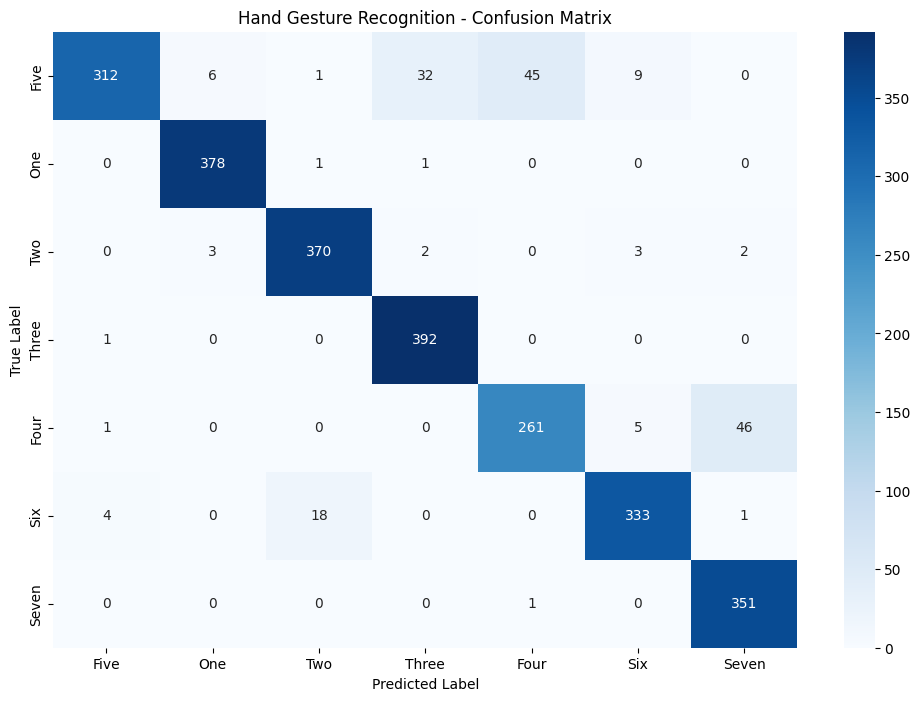


Classification Report:
              precision    recall  f1-score   support

        Five       0.98      0.77      0.86       405
         One       0.98      0.99      0.99       380
         Two       0.95      0.97      0.96       380
       Three       0.92      1.00      0.96       393
        Four       0.85      0.83      0.84       313
         Six       0.95      0.94      0.94       356
       Seven       0.88      1.00      0.93       352

    accuracy                           0.93      2579
   macro avg       0.93      0.93      0.93      2579
weighted avg       0.93      0.93      0.93      2579



In [15]:
# Import additional required libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def visualize_results(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Load labels
    labels = []
    with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
              encoding='utf-8-sig') as f:
        for row in csv.reader(f):
            labels.append(row[0])
    
    # Use all class indices for consistent labeling
    class_indices = list(range(len(labels)))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes, labels=class_indices)
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    
    plt.title('Hand Gesture Recognition - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes, labels=class_indices, target_names=labels))

# Generate and display confusion matrix
visualize_results(model, X_test, y_test)

In [16]:
# Save visualization results
def save_results(model, X_test, y_test, save_path='model/evaluation/'):
    import os
    
    # Create directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Load labels
    labels = []
    with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
              encoding='utf-8-sig') as f:
        for row in csv.reader(f):
            labels.append(row[0])
    
    # Use all class indices for consistent labeling
    class_indices = list(range(len(labels)))
    
    # Create and save confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes, labels=class_indices)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    
    plt.title('Hand Gesture Recognition - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(os.path.join(save_path, 'confusion_matrix.png'), 
                bbox_inches='tight', 
                dpi=300)
    plt.close()
    
    # Save classification report
    with open(os.path.join(save_path, 'classification_report.txt'), 'w') as f:
        f.write("Classification Report:\n")
        f.write(classification_report(y_test, y_pred_classes, labels=class_indices, target_names=labels))

# Save the results
save_results(model, X_test, y_test)

81/81 [==============================] - 0s 1ms/step


In [17]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [18]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 68ms/step
[1.4097854e-03 5.1428550e-01 3.4457660e-01 4.6667352e-02 7.2518094e-03
 6.0767870e-02 2.5029924e-02 5.4258558e-06 5.7136449e-06]
1


# Mixed rows

81/81 [==============================] - 0s 1ms/step


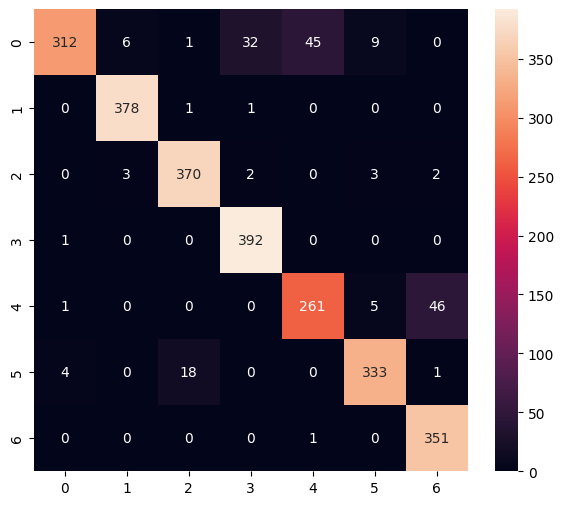

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       405
           1       0.98      0.99      0.99       380
           2       0.95      0.97      0.96       380
           3       0.92      1.00      0.96       393
           4       0.85      0.83      0.84       313
           5       0.95      0.94      0.94       356
           6       0.88      1.00      0.93       352

    accuracy                           0.93      2579
   macro avg       0.93      0.93      0.93      2579
weighted avg       0.93      0.93      0.93      2579



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [20]:
def analyze_misclassifications(y_true, y_pred, save_dir='model/evaluation/'):
    """Analyze and display misclassifications with saved visualizations"""
    import os
    
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # Load gesture labels
    labels = []
    with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
              encoding='utf-8-sig') as f:
        for row in csv.reader(f):
            labels.append(row[0])
    
    # Create misclassification matrix
    misclass_matrix = np.zeros((len(labels), len(labels)))
    for true_idx, pred_idx in zip(y_true, y_pred):
        if true_idx != pred_idx:
            misclass_matrix[true_idx][pred_idx] += 1
    
    # Create DataFrame
    df_misclass = pd.DataFrame(
        misclass_matrix,
        index=labels,
        columns=labels
    )
    
    # Save heatmap visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_misclass, 
                annot=True,
                fmt='g',
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    
    plt.title('Hand Gesture Misclassifications')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    
    # Save heatmap
    plt.savefig(os.path.join(save_dir, 'misclassification_matrix.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Create bar plot
    plt.figure(figsize=(12, 6))
    misclass_counts = [(i, j, misclass_matrix[i][j]) 
                      for i in range(len(labels)) 
                      for j in range(len(labels)) 
                      if i != j and misclass_matrix[i][j] > 0]
    
    # Sort by count
    misclass_counts.sort(key=lambda x: x[2], reverse=True)
    
    # Prepare data for bar plot
    pairs = [f"{labels[i]}->{labels[j]}" for i, j, _ in misclass_counts]
    counts = [count for _, _, count in misclass_counts]
    
    # Create bar plot
    bars = plt.bar(pairs, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title("Misclassification Distribution")
    plt.xlabel("True Label -> Predicted Label")
    plt.ylabel("Count")
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Save bar plot
    plt.savefig(os.path.join(save_dir, 'misclassification_distribution.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Save numerical results to text file
    with open(os.path.join(save_dir, 'misclassification_analysis.txt'), 'w') as f:
        f.write("=== Misclassification Analysis ===\n\n")
        f.write("True Label\tPredicted as\tCount\n")
        f.write("-" * 40 + "\n")
        for i, j, count in misclass_counts:
            f.write(f"{labels[i]}\t\t{labels[j]}\t\t{int(count)}\n")

# Run the analysis
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
analyze_misclassifications(y_test, y_pred)

81/81 [==============================] - 0s 1ms/step


In [21]:
# Add after the visualize_results and save_results functions, before TF Lite conversion
def analyze_class_distribution(y_true, y_pred, labels):
    """Analyze the distribution of classes in true and predicted data"""
    print("\nClass Distribution Analysis:")
    print("-" * 50)
    
    for i, label in enumerate(labels):
        true_count = np.sum(y_true == i)
        pred_count = np.sum(y_pred == i)
        print(f"Class '{label}':")
        print(f"  True samples: {true_count}")
        print(f"  Predicted samples: {pred_count}")
        print("-" * 30)

# Run the analysis after model predictions
Y_pred = model.predict(X_test)
y_pred_classes = np.argmax(Y_pred, axis=1)

# Load labels
labels = []
with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
          encoding='utf-8-sig') as f:
    for row in csv.reader(f):
        labels.append(row[0])

# Analyze class distribution
analyze_class_distribution(y_test, y_pred_classes, labels)

81/81 [==============================] - 0s 1ms/step

Class Distribution Analysis:
--------------------------------------------------
Class 'Five':
  True samples: 405
  Predicted samples: 318
------------------------------
Class 'One':
  True samples: 380
  Predicted samples: 387
------------------------------
Class 'Two':
  True samples: 380
  Predicted samples: 390
------------------------------
Class 'Three':
  True samples: 393
  Predicted samples: 427
------------------------------
Class 'Four':
  True samples: 313
  Predicted samples: 307
------------------------------
Class 'Six':
  True samples: 356
  Predicted samples: 350
------------------------------
Class 'Seven':
  True samples: 352
  Predicted samples: 400
------------------------------


81/81 [==============================] - 0s 1ms/step


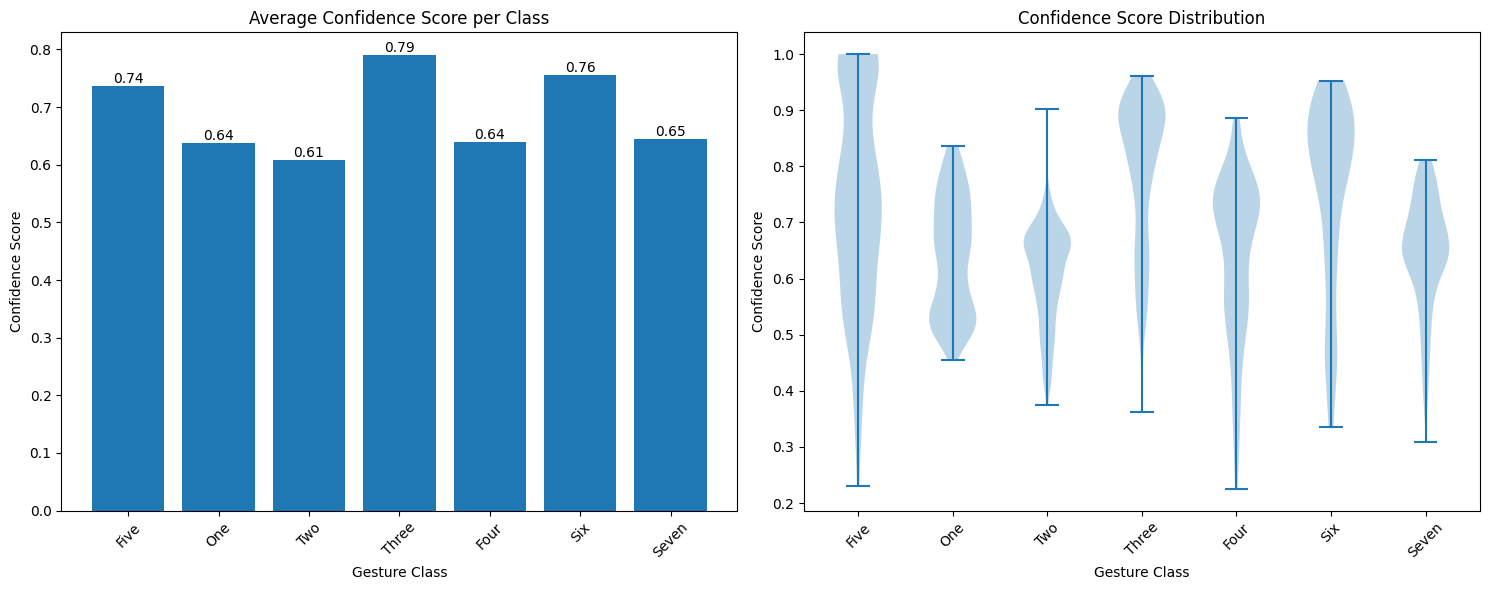


Confidence Score Statistics:
--------------------------------------------------

Class: Five
  Average confidence: 0.737
  Min confidence: 0.230
  Max confidence: 1.000
  Std deviation: 0.187

Class: One
  Average confidence: 0.638
  Min confidence: 0.454
  Max confidence: 0.836
  Std deviation: 0.102

Class: Two
  Average confidence: 0.607
  Min confidence: 0.375
  Max confidence: 0.902
  Std deviation: 0.086

Class: Three
  Average confidence: 0.790
  Min confidence: 0.363
  Max confidence: 0.960
  Std deviation: 0.134

Class: Four
  Average confidence: 0.639
  Min confidence: 0.225
  Max confidence: 0.886
  Std deviation: 0.145

Class: Six
  Average confidence: 0.756
  Min confidence: 0.335
  Max confidence: 0.953
  Std deviation: 0.166

Class: Seven
  Average confidence: 0.645
  Min confidence: 0.308
  Max confidence: 0.811
  Std deviation: 0.099


In [22]:
# Add this function after your existing visualization functions
def visualize_confidence_scores(model, X_test, y_test, labels, save_path='model/evaluation/'):
    """Visualize prediction confidence scores with charts"""
    import os
    
    # Get model predictions and confidence scores
    predictions = model.predict(X_test)
    y_pred = np.argmax(predictions, axis=1)
    
    # Create figure for confidence visualization
    plt.figure(figsize=(15, 6))
    
    # 1. Bar chart of average confidence per class
    plt.subplot(1, 2, 1)
    avg_confidence = []
    for i in range(len(labels)):
        mask = y_test == i
        if np.any(mask):
            class_confidence = predictions[mask].max(axis=1)
            avg_confidence.append(np.mean(class_confidence))
        else:
            avg_confidence.append(0)
    
    bars = plt.bar(labels, avg_confidence)
    plt.title('Average Confidence Score per Class')
    plt.xlabel('Gesture Class')
    plt.ylabel('Confidence Score')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # 2. Confidence distribution violin plot
    plt.subplot(1, 2, 2)
    confidence_data = []
    for i in range(len(labels)):
        mask = y_test == i
        if np.any(mask):
            class_confidence = predictions[mask].max(axis=1)
            confidence_data.append(class_confidence)
        else:
            confidence_data.append([])
    
    violin_parts = plt.violinplot(confidence_data)
    plt.title('Confidence Score Distribution')
    plt.xlabel('Gesture Class')
    plt.ylabel('Confidence Score')
    plt.xticks(range(1, len(labels) + 1), labels, rotation=45)
    
    # Adjust layout and save
    plt.tight_layout()
    
    # Save plot if save_path provided
    if save_path:
        os.makedirs(save_path, exist_ok=True)
        plt.savefig(os.path.join(save_path, 'confidence_analysis.png'), 
                    bbox_inches='tight', dpi=300)
    
    plt.show()
    
    # Print detailed confidence statistics
    print("\nConfidence Score Statistics:")
    print("-" * 50)
    for i, label in enumerate(labels):
        mask = y_test == i
        if np.any(mask):
            conf_scores = predictions[mask].max(axis=1)
            print(f"\nClass: {label}")
            print(f"  Average confidence: {np.mean(conf_scores):.3f}")
            print(f"  Min confidence: {np.min(conf_scores):.3f}")
            print(f"  Max confidence: {np.max(conf_scores):.3f}")
            print(f"  Std deviation: {np.std(conf_scores):.3f}")

# Add this code after model evaluation
# Load labels if not already loaded
labels = []
with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
          encoding='utf-8-sig') as f:
    for row in csv.reader(f):
        labels.append(row[0])

# Generate confidence visualization
visualize_confidence_scores(model, X_test, y_test, labels)

# Tensorflow-Lite Convert to a model for

In [23]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

In [24]:
# Transform the model (quantize it)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmp39z520pt\assets


INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmp39z520pt\assets


6792

# Reasoning test

In [25]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [26]:
# Get input/output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [27]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [28]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [29]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4097858e-03 5.1428545e-01 3.4457660e-01 4.6667363e-02 7.2518080e-03
 6.0767878e-02 2.5029926e-02 5.4258603e-06 5.7136390e-06]
1


In [30]:
def benchmark_model(model, X_test):
    """Measure model performance metrics"""
    import time
    
    # Warm-up run
    model.predict(X_test[:1])
    
    # Measure inference time
    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    
    avg_inference_time = (end_time - start_time) / len(X_test) * 1000  # ms
    
    print("\nModel Performance Metrics:")
    print("-" * 50)
    print(f"Average Inference Time: {avg_inference_time:.2f} ms")
    print(f"Model Size: {os.path.getsize('model/keypoint_classifier/keypoint_classifier.keras')/1024:.2f} KB")
    print(f"Input Shape: {model.input_shape}")
    print(f"Number of Parameters: {model.count_params():,}")